In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

dataframe = pd.read_csv('./Data/bank.csv')

nor_dataframe = dataframe.values[:,0:-1]
X = (nor_dataframe - nor_dataframe.mean())/nor_dataframe.std()

X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)

y = dataframe.values[:,[-1]]
theta = np.zeros([1, X.shape[1]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('X Shape : ', X.shape)
print('Y Shape : ', y.shape)
print('THETA Shape : ', theta.shape)

X Shape :  (41188, 21)
Y Shape :  (41188, 1)
THETA Shape :  (1, 21)


In [2]:
def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

def hypothesis(X, theta):
    h = sigmoid(X@theta.T)
    return h

def cost_fn(X, y, theta, regularization):

    if regularization == False:
        cost = (-1/len(X))*(np.sum(y * np.log(hypothesis(X, theta)) + (1-y) * np.log(1-hypothesis(X, theta))))
        return cost
    elif regularization == True:
        lam = 0.1
        cost = (-1/len(X))*(np.sum(y * np.log(hypothesis(X, theta)) + (1-y) * np.log(1-hypothesis(X, theta)))+lam/(2*len(X))*np.sum(np.power(theta,2)))
        return cost

def gradientDescent(X, y, theta, alpha, epochs, regularization):
    cost_list = np.zeros(epochs)
    lam = 1000

    if regularization == False:
        for i in range(epochs):

            theta = theta - alpha*(1/len(X))*(np.sum((hypothesis(X, theta)-y)*X))
            cost_list[i] = cost_fn(X, y, theta, regularization)

        return theta, cost_list
    elif regularization == True:
        for i in range(epochs):

            theta = theta - alpha*(1/len(X))*(np.sum((hypothesis(X, theta)-y)*X)+lam/len(X)*theta)
            cost_list[i] = cost_fn(X, y, theta, regularization)
        return theta, cost_list

Get Final THETA :  [[-1.49859751 -1.49859751 -1.49859751 -1.49859751 -1.49859751 -1.49859751
  -1.49859751 -1.49859751 -1.49859751 -1.49859751 -1.49859751 -1.49859751
  -1.49859751 -1.49859751 -1.49859751 -1.49859751 -1.49859751 -1.49859751
  -1.49859751 -1.49859751 -1.49859751]]
Get Final COST :  0.009022867961682234


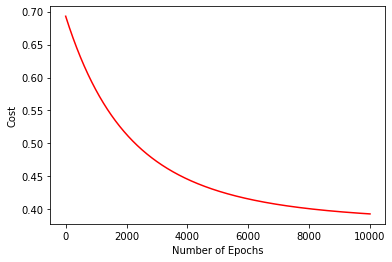

In [3]:
learning_rate = 0.001
epochs = 10000

f_theta, cost_list = gradientDescent(X_train, y_train, theta, learning_rate, epochs, regularization=False)
print('Get Final THETA : ', f_theta)

f_cost = cost_fn(X_test[1], y_test[1], f_theta, regularization = False)
print('Get Final COST : ', f_cost)

plt.plot(np.arange(epochs), cost_list, 'r')
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')
plt.show()

In [ ]:
print('테스트 데이터 개수 : ', len(X_test))
for i in range(len(X_test)):
    predicted = hypothesis(X_test[i], f_theta)

    if predicted >= 0.5:
        result = 1
    elif predicted < 0.5:
        result = 0
    print('\n----- 예측 결과 출력 -----')
    print('정답 : ', y_test[i])
    print('예측 결과', result)